In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

In [194]:
df = pd.read_excel('../Raw_data/Amig_AMZ_Data_Dic.xlsx', sheet_name = 'Ventas_2022', keep_default_na = False).replace('', 0)

In [195]:
df

,Codigo,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,658,0,0,0,0,25,0,0,0,0,...,25,0,0,0,0,125,25,0,0,0
1,859,50,25,150,0,50,50,0,25,50,...,0,0,0,0,0,0,125,0,0,100
2,1065,0,0,10,10,0,0,10,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3263,1,0,0,1,0,7,0,2,4,...,16,32,7,1,8,28,39,37,9,16
4,3265,2,3,10,0,4,10,4,0,3,...,18,72,63,0,0,0,0,0,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,9822,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
1102,24461,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
1103,24401,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
1104,21756,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [198]:
df_t = df.transpose()

In [199]:
df_t.columns = df_t.iloc[0]
df_t.drop(index = df_t.index[0], axis = 1, inplace = True)
df_t.index.names = ['WEEKS']

In [200]:
df_t

Codigo,658,859,1065,3263,3265,6102,5140,20158,200,21139,...,23157,27134,8050,23575,6235,9822,24461,24401,21756,858
WEEKS,,,,,,,,,,,,,,,,,,,,,
1,0,50,0,1,2,34,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,25,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,150,10,0,10,10,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,10,1,0,60,20,2,20,0,...,0,0,0,0,0,0,0,0,0,0
5,25,50,0,0,4,40,0,2,20,1,...,0,0,0,0,0,0,0,0,0,0
6,0,50,0,7,10,0,0,0,40,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,10,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,25,0,2,0,2,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,50,0,4,3,6,0,0,10,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot: xlabel='WEEKS'>

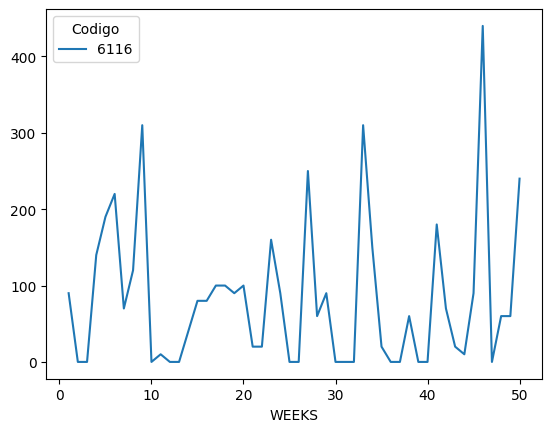

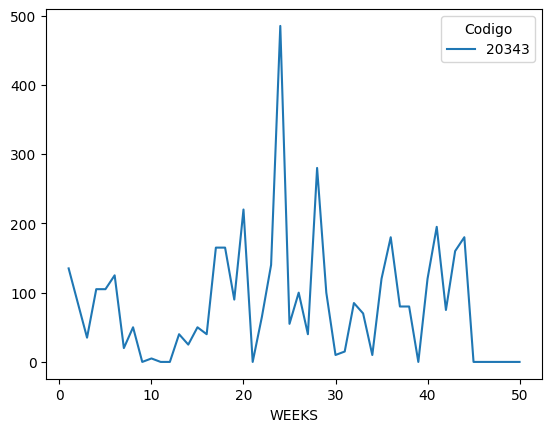

In [201]:
df_t.plot(y = [6116])
df_t.plot(y = [20343])

In [207]:
prod_6116_dec = seasonal_decompose(x = df_t[6116], model = 'additive', period = 1)

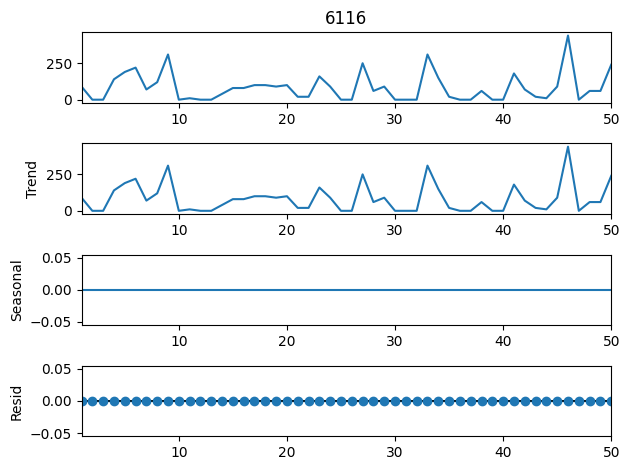

In [208]:
prod_6116_dec.plot()
plt.show()

In [209]:
adfuller(df_t[6116])

(-5.080824507139131,
 1.5318535334251698e-05,
 2,
 47,
 {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064},
 458.5185222425328)

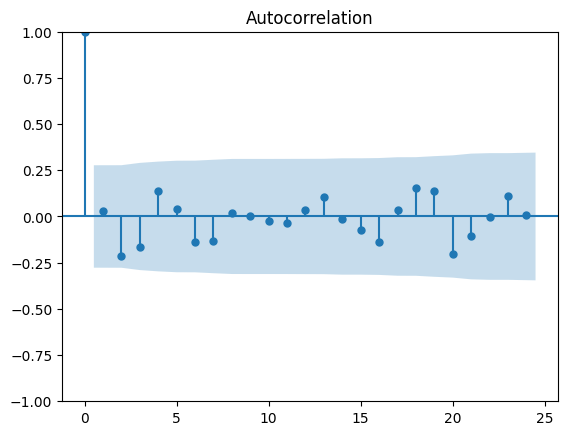

In [205]:
plot_acf(df_t[6116], lags=24)
plt.show()

/Users/jaimesoroarubio/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


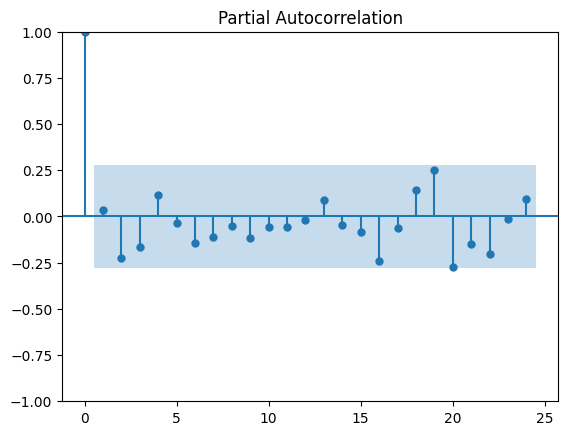

In [206]:
plot_pacf(df_t[6116], lags=24)
plt.show()